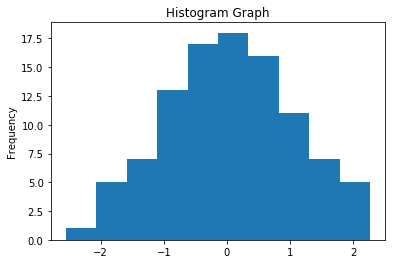

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

values = np.random.randn(100)
s = pd.Series(values)
s.plot(kind='hist', title='Histogram Graph')
plt.show()

In [1]:
##################### Chapter 3: Appending examples Begin ##############################
import pandas as pd

df = pd.DataFrame(columns=['A', 'B', 'C'])
df

,A,B,C


In [2]:
# Appending a row by a single column value
df.loc[0,'A'] = 1
df

,A,B,C
0,1,NaN,NaN


In [3]:
# Appending a row, given list of values
df.loc[1] = [2,3,4]
df

,A,B,C
0,1,NaN,NaN
1,2,3,4


In [5]:
# Appending a row given a dictionary
df.loc[2] = {'A':5, 'B':6, 'C':7}
df

,A,B,C
0,1,NaN,NaN
1,2,3,4
2,5,6,7


In [7]:
# Overwrite the values
df.loc[1] = [8, 9, 0]
df

,A,B,C
0,1,NaN,NaN
1,8,9,0
2,5,6,7


In [9]:
df.loc[0, 'B'] = 8  # updating the 0th row of B col value
df

,A,B,C
0,1,8,NaN
1,8,9,0
2,5,6,7


In [14]:
import pandas as pd

df1 = pd.DataFrame(columns = ['A', 'B'])
df2 = pd.DataFrame(columns = ['B', 'C'])
df1.loc[0] = ['a1', 'b1'] 
df1.loc[1] = ['a2', 'b2']
df2.loc[0] = ['b1', 'c1']
df1

,A,B
0,a1,b1
1,a2,b2


In [15]:
df2

,B,C
0,b1,c1


In [18]:
# Append a DataFrame to another DataFrame

df1.append(df2, sort=True)  # sort=True to avoid warning

,A,B,C
0,a1,b1,NaN
1,a2,b2,NaN
0,NaN,b1,c1


In [20]:
# To avoid duplicate indices
df1.append(df2,ignore_index = True, sort=True)

,A,B,C
0,a1,b1,NaN
1,a2,b2,NaN
2,NaN,b1,c1


In [2]:
##################### Appending examples End ##############################

In [3]:
## Chapter 4: Boolean indexing of dataframes Begin #

In [6]:
import pandas as pd

In [8]:
df3 = pd.DataFrame({'color':['Red','Blue', 'Green', 'White']},
                   index=[True, False, True, False])
df3

,color
True,Red
False,Blue
True,Green
False,White


In [10]:
df3.loc[True]

,color
True,Red
True,Green


In [12]:
# df3.iloc[True] : Will throw an Error by passing value instead send by Index

df3.iloc[1]

color    Blue
dtype: object

In [13]:
# Applying Boolean mask to a df

df3[[True, False, True, False]] # Will fetch data only for True values

,color
True,Red
True,Green


In [17]:
# Fetching data based on the Column value

df4 = pd.DataFrame({'color':['Red', 'Blue', 'Brown','Black'],
                   'name': ['British', 'Aliens', 'Asia','Africa'],
                    'size': ['6', '4', '5', '6']})
df4

,color,name,size
0,Red,British,6
1,Blue,Aliens,4
2,Brown,Asia,5
3,Black,Africa,6


In [22]:
df4['name'] == 'Asia' # It'll return a Boolean value

0    False
1    False
2     True
3    False
Name: name, dtype: bool

In [24]:
# Fetching data based on Column value: by storing in a var and printing df or you can use __getitem__()

val = df4['name'] == 'Asia'
df4[val]

,color,name,size
2,Brown,Asia,5


In [26]:
# using __getitem__

df4.__getitem__(val)

,color,name,size
2,Brown,Asia,5


In [27]:
# Fetching data based on the Index value

df5 = pd.DataFrame({'color':['Red', 'Blue', 'Brown','Black'],
                   'name': ['British', 'Aliens', 'Asia','Africa']},
                   index = ['1', '2', '3', '4'])
df5

,color,name
1,Red,British
2,Blue,Aliens
3,Brown,Asia
4,Black,Africa


In [31]:
df5.index == '3' # It'll return a Boolean value

array([False, False,  True, False])

In [32]:
# Fetching data based on Index value: by storing in a var and printing df or you can use __getitem__()

val = df5.index == '3'
df5[val]

,color,name
3,Brown,Asia


In [33]:
# By using __getitme__

val = df5.index == '3'
df5.__getitem__(val)

,color,name
3,Brown,Asia


In [39]:
# The important difference being, when .loc only encounters one row in the index that matches, it will return a pd.Series, 
# if it encounters more rows that matches, it will return a pd.DataFrame

df5.loc[['2']]   # DataFrame - 2d data


,color,name
2,Blue,Aliens


In [41]:
df5.loc['1']  # Series - 1d data

color        Red
name     British
Name: 1, dtype: object

In [42]:
##### Chapter 4 Ends ######

In [43]:
###### Chapter 5: Categorical Data Begins #####

In [1]:
import pandas as pd

s = pd.Series(['a', 'b', 'c', 'a', 'c'], dtype='category') # Declaring dtype while creating a Seried
s

0    a
1    b
2    c
3    a
4    c
dtype: category
Categories (3, object): [a, b, c]

In [3]:
df = pd.DataFrame({'A': ['a', 'b', 'c', 'b', 'a']})
df['B'] = df['A'].astype('category') # Converting DataFrame into Categorical by using 'asType' Category
df['c'] = pd.Categorical(df['A'])    # Converting DataFrame into Categorical by using 'pd.Categorical()'
df

,A,B,c
0,a,a,a
1,b,b,b
2,c,c,c
3,b,b,b
4,a,a,a


In [5]:
df.dtypes

A      object
B    category
c    category
dtype: object

In [10]:
# Creating a Large Random Datasets

import pandas as pd
import numpy as np


df1 = pd.DataFrame(np.random.choice(['foo', 'bar', 'foi'], size=(25, 3)))

df1 = df1.apply(lambda col: col.astype('category'))  

"""
# Lambda is a anonymous function that is defined without a name. 
# Syntax lambda arguments: expression
# col is an arg & col.astype('category') is an expr 
# ex: double = lambda x: x * 2 ## This is nearly same as def double(x):
#                                                           return x * 2
# print(double(5))  o/p: 10
"""

df1.head()  # Printing the Top 5 Rows data

,0,1,2
0,foo,bar,foi
1,foi,foo,bar
2,foo,bar,foi
3,foi,bar,foi
4,bar,foi,bar


In [12]:
df1 # Printing Complete DataFrame

,0,1,2
0,foo,bar,foi
1,foi,foo,bar
2,foo,bar,foi
3,foi,bar,foi
4,bar,foi,bar
5,foo,bar,foo
6,foi,foo,foo
7,foi,foi,bar
8,foi,foi,foo
9,foi,bar,bar


In [14]:
df1.dtypes # To print the Data Type of the columns

0    category
1    category
2    category
dtype: object

In [15]:
df1.shape # To Print No. of Rows & Cols

(25, 3)

In [16]:
###### Chapter 5: Categorical Data Ends #####

In [17]:
###### Chapter 6: Computational Tools Begins #####

In [18]:
# Find The Correlation Between Columns

In [24]:
"""
Pearson correlation coefficient is a measure of the linear correlation between two variables X and Y. It has a value between +1 and −1, 
where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation
"""

df2 = pd.DataFrame({'A': ['0', '1', '2', '2', '1']})
df2['B'] = df2['A']
df2

,A,B
0,0,0
1,1,1
2,2,2
3,2,2
4,1,1


In [29]:
df2.corr()

""


In [27]:
df = pd.DataFrame(np.random.randn(100, 3), columns=['a','b','c'])
df.corr(method='pearson') # or df.corr() # by default Method is Pearson

,a,b,c
a,1.000000,0.022570,-0.098944
b,0.022570,1.000000,-0.016201
c,-0.098944,-0.016201,1.000000


In [28]:
df.corr(method='spearman')

,a,b,c
a,1.000000,-0.052985,-0.103150
b,-0.052985,1.000000,-0.021266
c,-0.103150,-0.021266,1.000000


In [30]:
###### Chapter 6: Computational Tools Ends #####

In [ ]:
###### Chapter 7: Creating Data Frames #####